In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
def setup_axes(ax):
    ax.add_feature(cfeature.LAND, facecolor='lightgrey', zorder=2)
    ax.coastlines(resolution='110m', color='black', lw=2)
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')


def label_ax(ax, label, position='top', fontsize=16):
    if position == 'inside':
        ax.annotate(
            label,
            xy=(0, 1), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize=fontsize, verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1.', edgecolor='k', pad=3.0))
    elif position == 'top':
        ax.text(
            0.0, 1.0, label, transform=(
                ax.transAxes + ScaledTranslation(7/72, +3/72, fig.dpi_scale_trans)),
            fontsize=fontsize, va='bottom', fontfamily='sans-serif')

In [3]:
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [4]:
data_fold = '../final_data'
ds = xr.open_dataset(f'{data_fold}/ratio_attrs.nc')

In [5]:
target_month = xr.concat([(m+ds['lead']-1)%12+1 for m in ds['month']], dim='month')
ds['target_month'] = target_month

In [6]:
ver_all = xr.concat(
    [ds['ABS_LOG_INTENSITY_50_RATIO'].where(ds['target_month']==int(vm)) for vm in np.arange(12)+1],
    dim='target_month'
)
ver_all['target_month'] = np.arange(12)+1

In [7]:
data_monthly = ver_all.mean('month')
data_anom = data_monthly - data_monthly.mean('target_month')
data = np.exp(data_anom.mean('lead'))

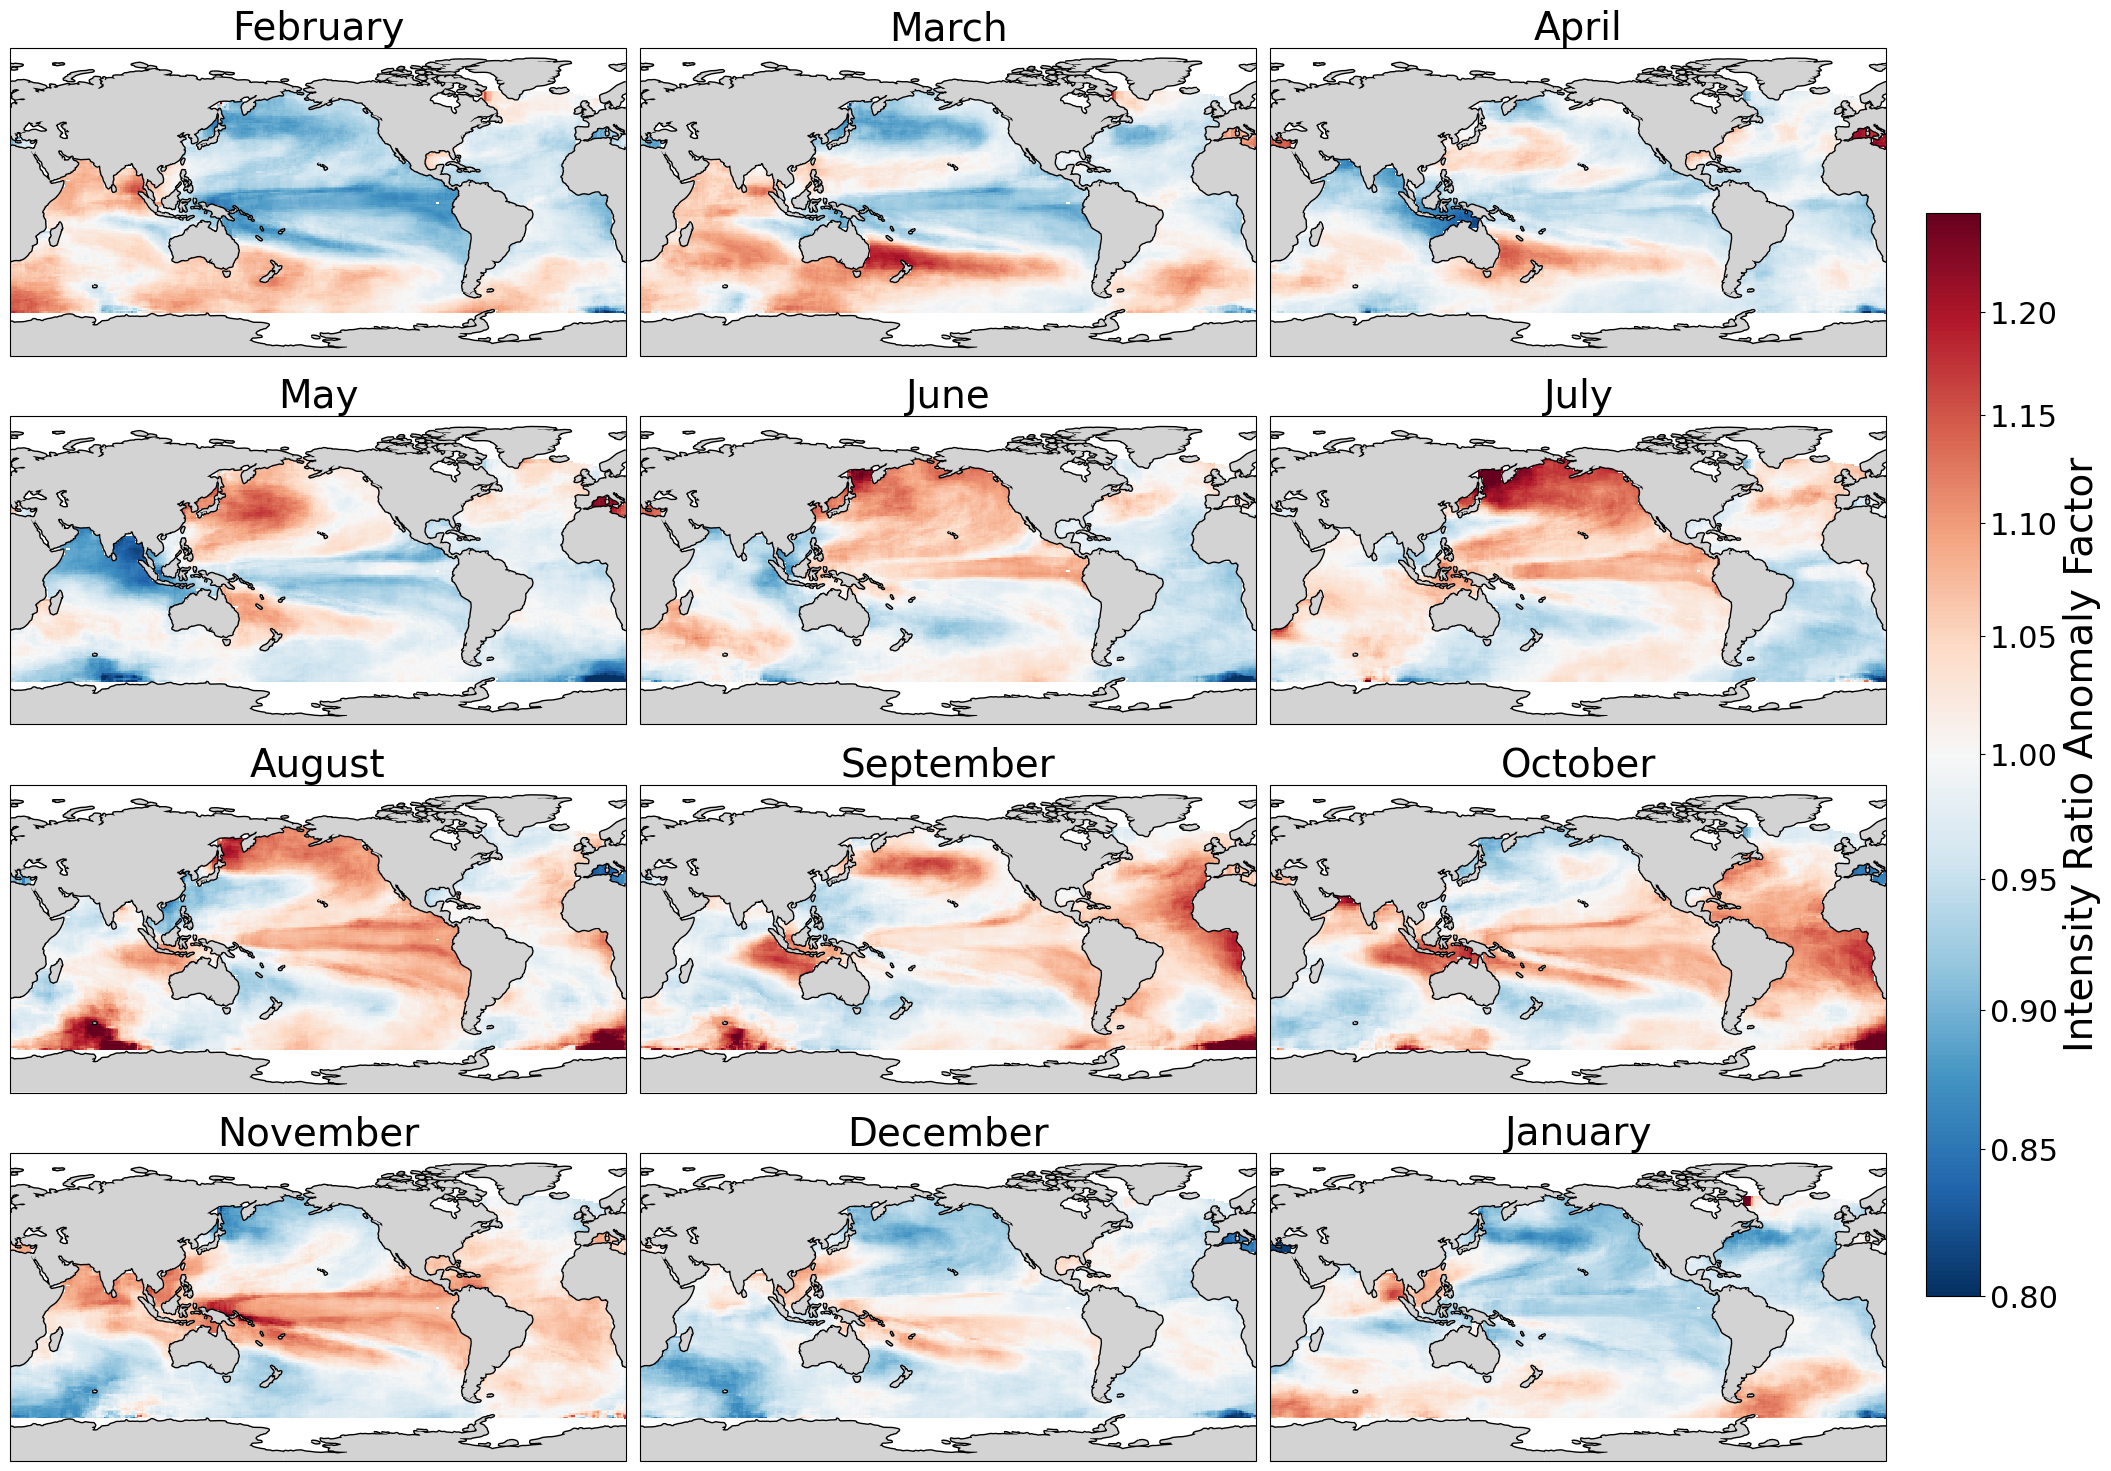

In [8]:
label_pos = 'top'
labelsize = 28
cbarnumbersize = 22
cbartextsize = 28
textsize=28
ms = [2,3,4,5,6,7,8,9,10,11,12,1]
vmin, vmax = 0.8, 1/0.8
cnorm = LogNorm(vmin=vmin, vmax=vmax)

fig, axs = plt.subplots(4, 3, figsize=(20,15), subplot_kw={'projection': ccrs.PlateCarree(200)})
for i, ax in enumerate(axs.flatten()):
    setup_axes(ax)
    im = ax.pcolormesh(data.lon, data.lat, data.sel(target_month=ms[i]), transform=ccrs.PlateCarree(), cmap='RdBu_r', norm=cnorm)
    ax.set_title(f"{month_names[ms[i]]}", fontsize=textsize)
plt.tight_layout()
cbar = plt.colorbar(im, ax=axs, fraction=0.0275, pad=0.02)
cbar.set_label(label='Intensity Ratio Anomaly Factor', size=cbartextsize)
cbar.ax.tick_params(labelsize=cbarnumbersize)
cbar.ax.set_yticks([0.8+.05*i for i in range(9)], labels=[f'{0.8+.05*i:.2f}' for i in range(9)])
cbar.ax.minorticks_off()

plt.show()